# Graphical Representations of Data
By Evgenia "Jenny" Nitishinskaya, Maxwell Margenot, and Delaney Granizo-Mackenzie.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



Representing data graphically can be incredibly useful for learning how the data behaves and seeing potential structure or flaws. Care should be taken, as humans are incredibly good at seeing only evidence that confirms our beliefs, and visual data lends itself well to that. Plots are good to use when formulating a hypothesis, but should not be used to test a hypothesis.

We will go over some common plots here.

In [1]:
# Import our libraries

# This is for numerical processing
import numpy as np
# This is the library most commonly used for plotting in Python.
# Notice how we import it 'as' plt, this enables us to type plt
# rather than the full string every time.
import matplotlib.pyplot as plt

## Getting Some Data

If we're going to plot data we need some data to plot. We'll get the pricing data of Apple (AAPL) and Microsoft (MSFT) to use in our examples.

### Data Structure

Knowing the structure of your data is very important. Normally you'll have to do a ton of work molding your data into the form you need for testing. Quantopian has done a lot of cleaning on the data, but you still need to put it into the right shapes and formats for your purposes.

In this case the data will be returned as a pandas dataframe object. The rows are timestamps, and the columns are the two assets, AAPL and MSFT.

In [2]:
import pandas_datareader as pdr
import datetime
data2 = pdr.get_data_yahoo(['TSLA','PFE'],start=datetime.datetime(2014,1,1),end=datetime.datetime(2015,1,1))

data = data2['Close']

print(data2)

data.head()

Attributes  Adj Close                 Close  ...       Open      Volume            
Symbols          TSLA        PFE       TSLA  ...        PFE        TSLA         PFE
Date                                         ...                                   
2014-01-02  30.020000  22.159529  30.020000  ...  28.908918  30942000.0  18366266.0
2014-01-03  29.912001  22.203180  29.912001  ...  28.833017  23475000.0  15847312.0
2014-01-06  29.400000  22.225004  29.400000  ...  29.193548  26805500.0  25255421.0
2014-01-07  29.872000  22.363232  29.872000  ...  29.278936  25170500.0  23423042.0
2014-01-08  30.256001  22.515999  30.256001  ...  29.203035  30816000.0  24161053.0
...               ...        ...        ...  ...        ...         ...         ...
2014-12-24  44.452000  23.662304  44.452000  ...  29.829222   6661000.0  11407442.0
2014-12-26  45.563999  23.835520  45.563999  ...  29.886148  16635000.0   9071146.0
2014-12-29  45.141998  23.639715  45.141998  ...  29.848198  14012500.0  133

Symbols,TSLA,PFE
Date,,
2014-01-02,30.020000,28.899431
2014-01-03,29.912001,28.956356
2014-01-06,29.400000,28.984819
2014-01-07,29.872000,29.165085
2014-01-08,30.256001,29.364326


Much nicer, now we can index. Indexing into the 2D dataframe will give us a 1D series object. The index for the series is timestamps, the value upon index is a price. Similar to an array except instead of integer indecies it's times.

$$tesla\quad index = \left \{ 2014-01-01 ... 2015-01-01 \right \}$$

In [3]:
data['TSLA'].head()

Date
2014-01-02    30.020000
2014-01-03    29.912001
2014-01-06    29.400000
2014-01-07    29.872000
2014-01-08    30.256001
Name: TSLA, dtype: float64

##Histogram

A histogram is a visualization of how frequent different values of data are. By displaying a frequency distribution using bars, it lets us quickly see where most of the observations are clustered. The height of each bar represents the number of observations that lie in each interval. You can think of a histogram as an empirical and discrete Probability Density Function (PDF).

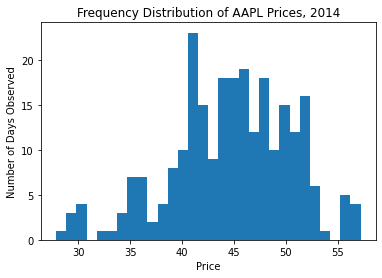

In [4]:
# Plot a histogram using 20 bins
plt.hist(data['TSLA'], bins=30)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of AAPL Prices, 2014');

### Returns Histogram

In finance rarely will we look at the distribution of prices. The reason for this is that prices are non-stationary and move around a lot. For more info on non-stationarity please see [this lecture](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity). Instead we will use daily returns. Let's try that now.

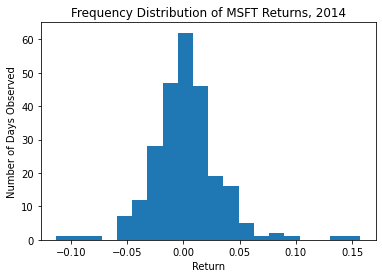

In [5]:
# Remove the first element because percent change from nothing to something is NaN
R = data['TSLA'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Returns, 2014');

### Cumulative Histogram (Discrete Estimated CDF)

An alternative way to display the data would be using a cumulative distribution function, in which the height of a bar represents the number of observations that lie in that bin or in one of the previous ones. This graph is always nondecreasing since you cannot have a negative number of observations. The choice of graph depends on the information you are interested in.

###Porcentaje de cambio

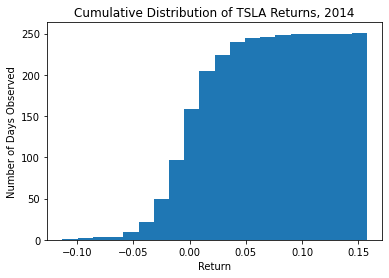

In [6]:
# Remove the first element because percent change from nothing to something is NaN
R = data['TSLA'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of TSLA Returns, 2014');

## Scatter plot

A scatter plot is useful for visualizing the relationship between two data sets. We use two data sets which have some sort of correspondence, such as the date on which the measurement was taken. Each point represents two corresponding values from the two data sets. However, we don't plot the date that the measurements were taken on.

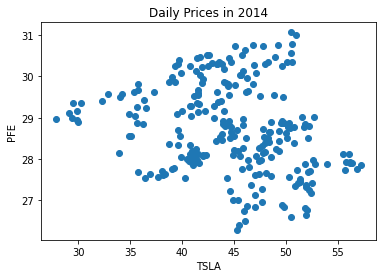

In [7]:
plt.scatter(data['TSLA'], data['PFE'])
plt.xlabel('TSLA')
plt.ylabel('PFE')
plt.title('Daily Prices in 2014');

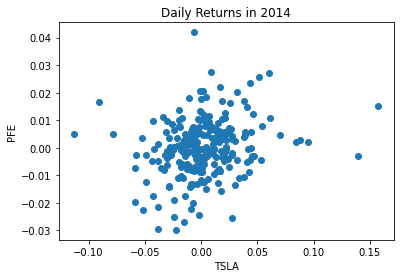

In [8]:
R_tsla = data['TSLA'].pct_change()[1:]
R_pfe = data['PFE'].pct_change()[1:]

plt.scatter(R_tsla, R_pfe)
plt.xlabel('TSLA')
plt.ylabel('PFE')
plt.title('Daily Returns in 2014');

# Line graph

A line graph can be used when we want to track the development of the y value as the x value changes. For instance, when we are plotting the price of a stock, showing it as a line graph instead of just plotting the data points makes it easier to follow the price over time. This necessarily involves "connecting the dots" between the data points, which can mask out changes that happened between the time we took measurements.

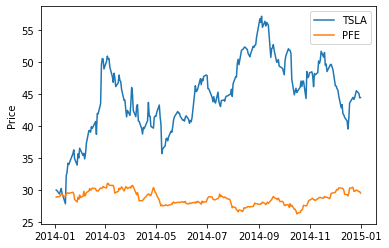

In [9]:
plt.plot(data['TSLA'])
plt.plot(data['PFE'])
plt.ylabel('Price')
plt.legend(['TSLA', 'PFE']);

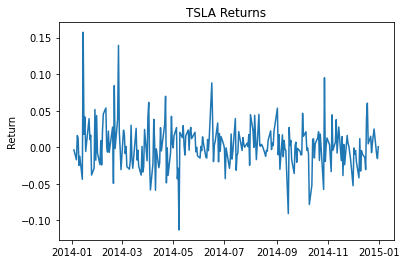

In [10]:
# Remove the first element because percent change from nothing to something is NaN
R = data['TSLA'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('TSLA Returns');